# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

In [1]:
# Let us start with importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Let us get the dataset 

In [2]:
dataset = pd.read_csv('Classified Data', index_col=0)

In [3]:
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Standardising Variable

Since K Nearest Neighbors calculates the distanec of nearest data point so we need to standardize the values 

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(dataset.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scaler.transform(dataset.drop('TARGET CLASS', axis=1))

In [8]:
dataset_x = pd.DataFrame(scaled_features,columns= dataset.columns[:-1])

In [9]:
dataset_x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(dataset_x,dataset['TARGET CLASS'], test_size=0.30,random_state=101)

### using KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
classifier = KNeighborsClassifier(n_neighbors=1)

In [14]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
pred = classifier.predict(X_test)

### Let us evaluate our model 

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.93      0.92       134
          1       0.92      0.90      0.91       116

avg / total       0.92      0.92      0.92       250



In [18]:
# We have 0.92 F1 score. But can we increase it ??
# Let us see

In [19]:
error_metric=[]
for i in range(1,40):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    error_metric.append(np.mean(pred!=y_test))

In [20]:
# Let us plot this data 

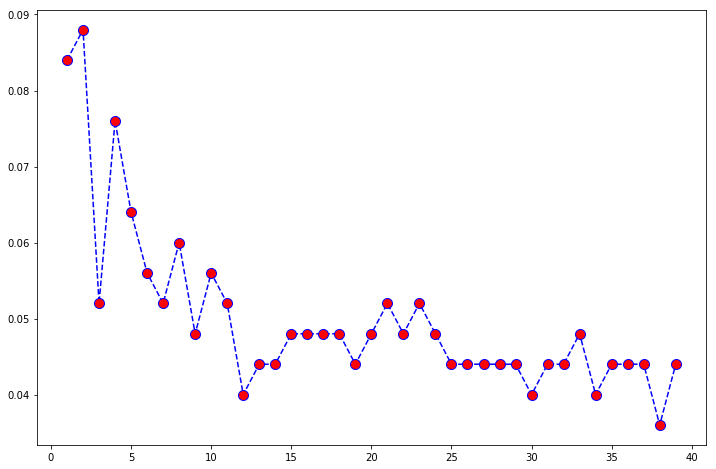

In [21]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_metric,color='blue',ls='--',marker='o',markersize=10,markerfacecolor='red')
plt.show()

In [22]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
classifier = KNeighborsClassifier(n_neighbors=1)

classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[125   9]
 [ 12 104]]


             precision    recall  f1-score   support

          0       0.91      0.93      0.92       134
          1       0.92      0.90      0.91       116

avg / total       0.92      0.92      0.92       250



In [24]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=12')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=12


[[130   4]
 [  6 110]]


             precision    recall  f1-score   support

          0       0.96      0.97      0.96       134
          1       0.96      0.95      0.96       116

avg / total       0.96      0.96      0.96       250



### We got F1 score of 0.96. Thats great